In [6]:
# Library import 

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd


In [39]:
# Sandbox

# url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

# parameters = {
#   'start':'1',
#   'limit':'5000',
#   'convert':'USD'
# }
# headers = {
#   'Accepts': 'application/json',
#   'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
# }

# session = Session()
# session.headers.update(headers)

# try:
#   response = session.get(url, params=parameters)
#   data = json.loads(response.text)
#   print(data)
# except (ConnectionError, Timeout, TooManyRedirects) as e:
#   print(e)
  

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
}


headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c5e70f3c-fc7e-4baf-a3dc-1bc9633e9c4e',  # Corrected header key
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    response.raise_for_status()  # Raise an error for HTTP issues (e.g., 401, 403)
    data = response.json()  # Use .json() for simplicity
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")

{'status': {'timestamp': '2024-12-10T02:54:00.902Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10253}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11826, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [3]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/categories'

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c5e70f3c-fc7e-4baf-a3dc-1bc9633e9c4e',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url)
    response.raise_for_status()  # Raises HTTPError for bad responses
    data_categories = response.json()
    print(data_categories)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
except Exception as e:
    print(f"An error occurred: {e}")


{'status': {'timestamp': '2024-12-10T02:54:09.202Z', 'error_code': 0, 'error_message': None, 'elapsed': 823, 'credit_count': 1, 'notice': None}, 'data': [{'id': '67502adb5c9f5b4ae748fae8', 'name': '2017/18 Alt season', 'title': '2017/18 Alt season', 'description': '2017/18 Alt season', 'num_tokens': 20, 'avg_price_change': -15.499494582777778, 'market_cap': 2162475746364.06, 'market_cap_change': -15.493766666666668, 'volume': 147058955079.08063, 'volume_change': 110.05556666666665, 'last_updated': '2024-12-04T10:12:00.448Z'}, {'id': '674959bead474122c10944fc', 'name': 'Pump Fun Ecosystem', 'title': 'Pump Fun Ecosystem', 'description': 'Pump Fun Ecosystem', 'num_tokens': 35, 'avg_price_change': -11.151087340967747, 'market_cap': 3245229324.680001, 'market_cap_change': -11.202841935483875, 'volume': 2411131808.4586577, 'volume_change': 21.029645161290322, 'last_updated': '2024-11-29T06:06:14.273Z'}, {'id': '6728840510071002652db3c2', 'name': 'Animal Memes', 'title': 'Animal Memes', 'desc

In [4]:
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows', None)

In [5]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11826,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.979198e+07,1.979198e+07,False,NaN,1,NaN,NaN,None,2024-12-10T02:52:00.000Z,97440.185975,1.116233e+11,123.4104,-0.550061,-1.687929,1.421265,25.900416,60.964599,70.945912,1.928534e+12,55.8007,2.046244e+12,None,2024-12-10T02:52:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-10 09:54:15.029525
1,1027,Ethereum,ETH,ethereum,9649,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204450e+08,1.204450e+08,True,NaN,2,NaN,NaN,None,2024-12-10T02:53:00.000Z,3713.195508,6.006962e+10,158.9870,-1.133882,-5.813782,1.795702,17.971101,54.788105,57.596319,4.472357e+11,12.9275,4.472357e+11,None,2024-12-10T02:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-10 09:54:15.029525
2,825,Tether USDt,USDT,tether,107440,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.383089e+11,1.411936e+11,True,NaN,3,NaN,NaN,None,2024-12-10T02:53:00.000Z,1.000938,2.756994e+11,107.8303,0.002157,0.051448,0.069225,0.042091,0.186138,0.100489,1.384386e+11,4.0009,1.413260e+11,None,2024-12-10T02:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-10 09:54:15.029525
3,52,XRP,XRP,xrp,1470,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.711723e+10,9.998690e+10,False,NaN,4,NaN,NaN,None,2024-12-10T02:53:00.000Z,2.166041,1.947220e+10,75.6683,-3.301185,-12.440415,-19.627849,278.557330,305.267138,304.873537,1.237182e+11,3.5790,2.166041e+11,None,2024-12-10T02:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-10 09:54:15.029525
4,5426,Solana,SOL,solana,804,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.761087e+08,5.898367e+08,True,NaN,5,NaN,NaN,None,2024-12-10T02:53:00.000Z,215.232620,9.050779e+09,168.3595,-1.626252,-7.004542,-5.889672,5.322769,53.211676,60.508570,1.024741e+11,2.9644,1.269521e+11,None,2024-12-10T02:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-10 09:54:15.029525
5,1839,BNB,BNB,bnb,2302,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440089e+08,1.440089e+08,False,NaN,6,NaN,NaN,None,2024-12-10T02:53:00.000Z,684.482515,3.311618e+09,60.3256,-1.234138,-5.068983,4.990657,8.713271,21.776630,32.825307,9.857154e+10,2.8515,9.857154e+10,None,2024-12-10T02:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-10 09:54:15.029525
6,74,Dogecoin,DOGE,dogecoin,1123,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.471362e+11,1.471362e+11,True,NaN,7,NaN,NaN,None,2024-12-10T02:53:00.000Z,0.402746,1.239900e+10,54.9520,-2.226981,-10.587185,-4.486168,77.788487,274.525390,296.132138,5.925845e+10,1.7120,5.925845e+10,None,2024-12-10T02:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-10 09:54:15.029525
7,3408,USDC,USDC,usd-coin,23667,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.066813e+10,4.066813e+10,False,NaN,8,NaN,NaN,None,2024-12-10T02:53:00.000Z,1.000327,1.780202e+10,151.7735,0.003822,0.049867,0.024476,0.039583,0.036780,0.041004,4.068141e+10,1.1757,4.068141e+10,None,2024-12-10T02:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-10 09:54:15.029525
8,2010,Cardano,ADA,cardano,1386,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500

In [44]:
import os
from datetime import datetime

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    parameters = {
    'start': '1',
    'limit': '15',
    'convert': 'USD'
    }

    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'c5e70f3c-fc7e-4baf-a3dc-1bc9633e9c4e',  # Corrected header key
    }

    session = Session()
    session.headers.update(headers)
    
    try:
        response = session.get(url, params=parameters)
        response.raise_for_status()  # Raise an error for HTTP issues (e.g., 401, 403)
        data = response.json()  # Use .json() for simplicity
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    except Exception as e:
        print(f"An error occurred: {e}")

    df_two = pd.json_normalize(data['data'])

    df_two['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df_two], ignore_index = True)

        # Save the final DataFrame to a CSV file with a unique name
    if not df.empty:  # Check if df is not empty
        # Get today's date
        today_date = datetime.now().strftime('%Y-%m-%d')
        base_filename = f"cryptocurrency_data_{today_date}"
        extension = ".csv"
        filename = base_filename + extension

        # Check for existing files and create a unique name
        counter = 1
        while os.path.exists(filename):
            filename = f"{base_filename}_{counter}{extension}"
            counter += 1

        # Save to CSV
        df.to_csv(filename, index=False)
        print(f"Final DataFrame saved to '{filename}'.")
    else:
        print("DataFrame is empty. No data to save.")



In [49]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print(f'API runner iteration {i+1} completed')
    sleep(60)
exit()

Final DataFrame saved to 'cryptocurrency_data_2024-12-02_3.csv'.
API runner iteration 1 completed
Final DataFrame saved to 'cryptocurrency_data_2024-12-02_4.csv'.
API runner iteration 2 completed


KeyboardInterrupt: 

In [ ]:
df

In [47]:
pd.set_option('display.float_format', lambda x: '%5f' % x)

In [50]:
print(df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply',
       'infinite_supply', 'platform', 'cmc_rank',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address', 'timestamp'],
      dtype='object')


In [55]:
name_df = df.groupby('name', sort = False)[['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

name_df

,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.093688,-1.582234,38.829058,57.295306,63.198129
Ethereum,-0.575001,8.846744,46.928906,53.575892,46.204582
XRP,27.570351,68.261796,368.280475,347.334472,325.114145
Tether USDt,0.026628,-0.010714,0.096566,0.081341,0.066328
Solana,-3.069288,-9.799301,37.252790,60.616839,69.214119
BNB,-0.233807,-1.737471,13.087664,18.302885,21.832285
Dogecoin,1.994926,3.149900,172.365506,313.945149,340.811240
USDC,0.013359,0.025073,0.003069,0.014802,0.018504
Cardano,7.574840,8.578570,213.932384,224.681469,238.073184


In [58]:
stacked_df = name_df.stack()

stacked_df

name                                     
Bitcoin      quote.USD.percent_change_24h     0.093688
             quote.USD.percent_change_7d     -1.582234
             quote.USD.percent_change_30d    38.829058
             quote.USD.percent_change_60d    57.295306
             quote.USD.percent_change_90d    63.198129
Ethereum     quote.USD.percent_change_24h    -0.575001
             quote.USD.percent_change_7d      8.846744
             quote.USD.percent_change_30d    46.928906
             quote.USD.percent_change_60d    53.575892
             quote.USD.percent_change_90d    46.204582
XRP          quote.USD.percent_change_24h    27.570351
             quote.USD.percent_change_7d     68.261796
             quote.USD.percent_change_30d   368.280475
             quote.USD.percent_change_60d   347.334472
             quote.USD.percent_change_90d   325.114145
Tether USDt  quote.USD.percent_change_24h     0.026628
             quote.USD.percent_change_7d     -0.010714
             quote.USD.

In [59]:
df_values = stacked_df.to_frame(name = 'values')

df_values

values
name                                               
Bitcoin     quote.USD.percent_change_24h   0.093688
            quote.USD.percent_change_7d   -1.582234
            quote.USD.percent_change_30d  38.829058
            quote.USD.percent_change_60d  57.295306
            quote.USD.percent_change_90d  63.198129
Ethereum    quote.USD.percent_change_24h  -0.575001
            quote.USD.percent_change_7d    8.846744
            quote.USD.percent_change_30d  46.928906
            quote.USD.percent_change_60d  53.575892
            quote.USD.percent_change_90d  46.204582
XRP         quote.USD.percent_change_24h  27.570351
            quote.USD.percent_change_7d   68.261796
            quote.USD.percent_change_30d 368.280475
            quote.USD.percent_change_60d 347.334472
            quote.USD.percent_change_90d 325.114145
Tether USDt quote.USD.percent_change_24h   0.026628
            quote.USD.percent_change_7d   -0.010714
            quote.USD.percent_change_30d   0.096566
            quote.USD.percent_change_60d   0.081341
            quote.USD.percent_change_90d   0.066328
Solana      quote.USD.percent_change_24h  -3.069288
            quote.USD.percent_change_7d   -9.799301
            quote.USD.percent_change_30d  37.252790
            quote.USD.percent_change_60d  60.616839
            quote.USD.percent_change_90d  69.214119
BNB         quote.USD.percent_change_24h  -0.233807
            quote.USD.percent_change_7d   -1.737471
            quote.USD.percent_change_30d  13.087664
            quote.USD.percent_change_60d  18.302885
            quote.USD.percent_change_90d  21.832285
Dogecoin    quote.USD.percent_change_24h   1.994926
            quote.USD.percent_change_7d    3.149900
            quote.USD.percent_change_30d 172.365506
            quote.USD.percent_change_60d 313.945149
            quote.USD.percent_change_90d 340.811240
USDC        quote.USD.percent_change_24h   0.013359
            quote.USD.percent_change_7d    0.025073
            quote.USD.percent_change_30d   0.003069
            quote.USD.percent_change_60d   0.014802
            quote.USD.percent_change_90d   0.018504
Cardano     quote.USD.percent_change_24h   7.574840
            quote.USD.percent_change_7d    8.578570
            quote.USD.percent_change_30d 213.932384
            quote.USD.percent_change_60d 224.681469
            quote.USD.percent_change_90d 238.073184
Avalanche   quote.USD.percent_change_24h   7.156727
            quote.USD.percent_change_7d   13.688571
            quote.USD.percent_change_30d  91.064176
            quote.USD.percent_change_60d  86.004864
            quote.USD.percent_change_90d 111.269697
TRON        quote.USD.percent_change_24h   2.028725
            quote.USD.percent_change_7d   -0.397371
            quote.USD.percent_change_30d  24.368417
            quote.USD.percent_change_60d  34.523476
            quote.USD.percent_change_90d  35.353198
Shiba Inu   quote.USD.percent_change_24h   0.764291
            quote.USD.percent_change_7d   17.421944
            quote.USD.percent_change_30d  69.454630
            quote.USD.percent_change_60d  80.637308
            quote.USD.percent_change_90d 119.430712
Toncoin     quote.USD.percent_change_24h  -1.788342
            quote.USD.percent_change_7d    7.817356
            quote.USD.percent_change_30d  33.767256
            quote.USD.percent_change_60d  24.191920
            quote.USD.percent_change_90d  25.754243
Stellar     quote.USD.percent_change_24h   8.073666
            quote.USD.percent_change_7d    3.050318
            quote.USD.percent_change_30d 484.729166
            quote.USD.percent_change_60d 497.609849
            quote.USD.percent_change_90d 483.048148
Polkadot    quote.USD.percent_change_24h   2.806209
            quote.USD.percent_change_7d    2.101725
            quote.USD.percent_change_30d 130.941310
            quote.USD.percent_change_60d 117.685210
            quote.USD.percent_change_90d 112.784575

In [60]:
df_values.count()

values    75
dtype: int64

In [62]:
index = pd.Index(range(90))

df_indexed = df_values.reset_index()

df_indexed

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_24h,0.093688
1,Bitcoin,quote.USD.percent_change_7d,-1.582234
2,Bitcoin,quote.USD.percent_change_30d,38.829058
3,Bitcoin,quote.USD.percent_change_60d,57.295306
4,Bitcoin,quote.USD.percent_change_90d,63.198129
5,Ethereum,quote.USD.percent_change_24h,-0.575001
6,Ethereum,quote.USD.percent_change_7d,8.846744
7,Ethereum,quote.USD.percent_change_30d,46.928906
8,Ethereum,quote.USD.percent_change_60d,53.575892
9,Ethereum,quote.USD.percent_change_90d,46.204582


In [75]:
clean_df = df_indexed.rename(columns = {'level_1': 'percentage_change'})

clean_df

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_24h,0.093688
1,Bitcoin,quote.USD.percent_change_7d,-1.582234
2,Bitcoin,quote.USD.percent_change_30d,38.829058
3,Bitcoin,quote.USD.percent_change_60d,57.295306
4,Bitcoin,quote.USD.percent_change_90d,63.198129
5,Ethereum,quote.USD.percent_change_24h,-0.575001
6,Ethereum,quote.USD.percent_change_7d,8.846744
7,Ethereum,quote.USD.percent_change_30d,46.928906
8,Ethereum,quote.USD.percent_change_60d,53.575892
9,Ethereum,quote.USD.percent_change_90d,46.204582


In [78]:
clean_df['percentage_change'] = clean_df['percentage_change'].replace(['quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['24h', '7d', '30d', '60d', '90d'])

clean_df

,name,percentage_change,values
0,Bitcoin,24h,0.093688
1,Bitcoin,7d,-1.582234
2,Bitcoin,30d,38.829058
3,Bitcoin,60d,57.295306
4,Bitcoin,90d,63.198129
5,Ethereum,24h,-0.575001
6,Ethereum,7d,8.846744
7,Ethereum,30d,46.928906
8,Ethereum,60d,53.575892
9,Ethereum,90d,46.204582


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

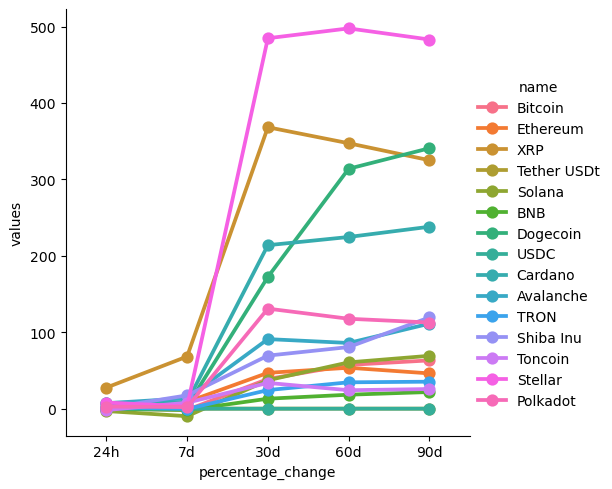

In [79]:
sns.catplot(x = 'percentage_change', y = 'values', hue = 'name', data = clean_df, kind = 'point')

In [85]:
df_bitcoin = df[['name', 'quote.USD.price', 'timestamp']]
df_bitcoin = df_bitcoin.query("name == 'Bitcoin' ")
df_bitcoin

,name,quote.USD.price,timestamp
0,Bitcoin,96258.333923,2024-12-02 11:13:01.953799
15,Bitcoin,96258.333923,2024-12-02 11:13:02.591841
30,Bitcoin,96291.106350,2024-12-02 11:14:03.580095
45,Bitcoin,96291.106350,2024-12-02 11:15:09.814769
60,Bitcoin,96902.267638,2024-12-02 12:08:43.413515
75,Bitcoin,96895.560506,2024-12-02 12:09:44.820698


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

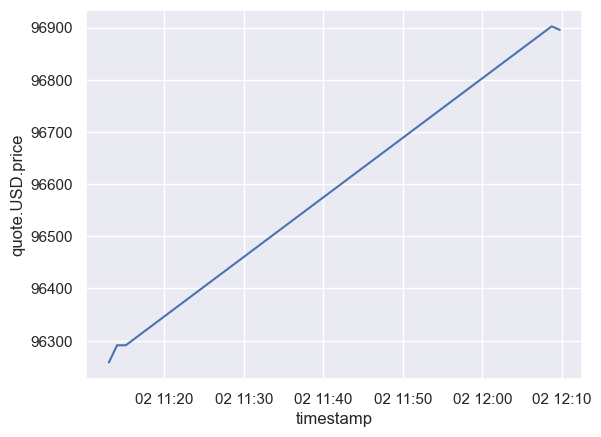

In [87]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df_bitcoin)